In [11]:
#for data preprocessing
import pandas as pd
#For plotting
import matplotlib.pyplot as plt
#for matrix math
import numpy as np
#for normalization + probability density function computation
from scipy import stats
import math
#for plotting
import seaborn as sns
sns.set_style("white")
%matplotlib inline

In [12]:
#read our dataset
df = pd.read_csv("HW3.csv")
#show first 5 examples (in BTC)
df.head()

,X
0,0.29617
1,1.20080
2,1.09020
3,-0.35870
4,-0.12993


In [13]:
df.describe()

,X
count,1000.000000
mean,1.288275
std,1.612349
min,-2.861400
25%,0.031861
50%,1.245900
75%,2.529775
max,5.966300


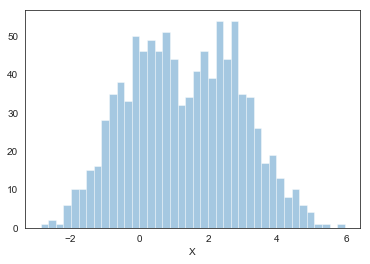

In [14]:
sns.distplot(df.X, bins=40, kde=False)

## الگوریتم EM

### گام نخست:مقدار دهی اولیه به پارامتر های مسئله 


#### لیست کامل پارامتر های مسئله با دو کلاس:
#### میانگین توزیع نرمال اولی
###### میانگین توزیع نرمال دومی
###### واریانس توزیع نرمال اولی
###### واریانس توزیع نرمال دومی
###### احتمال وجود یک داده در کلاس اولی

In [15]:
mu1=0.7
mu2=0.5
sigma1=1
sigma2=1

In [21]:
def pdf(x,mu,sigma):
        u = (x - mu) / abs(sigma)
        y = (1 / (math.sqrt(2 * math.pi) * abs(sigma))) * math.exp(-u * u / 2)
        return y

In [22]:
data=df.X

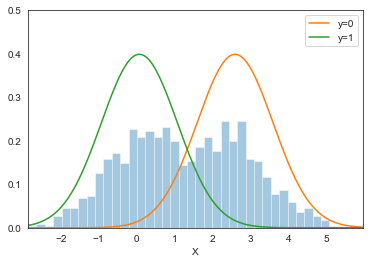

In [23]:
x = np.linspace(data.min(), data.max(), 200)
g_single = stats.norm(mu1, sigma1).pdf(x)
sns.distplot(data, bins=40, kde=False, norm_hist=True)
plt.plot(x, g_single, label='y=0')
g_single = stats.norm(mu2, sigma2).pdf(x)
plt.plot(x, g_single, label='y=1')
axes = plt.gca()
axes.set_xlim([data.min(),data.max()])
axes.set_ylim([0,0.5])
plt.legend();

In [26]:
f=0
g=0
for i in data:
    f=f+abs(i-mu1)
    g=g+abs(i-mu2)
p2=f/(f+g)
p1=g/(f+g)
p1=0.5
p2=0.5

In [27]:
p1old=2
for i in range(1,100):
    p1x=[]
    p2x=[]
    for x in data:
        #E-Step
        p1x.append((p1*pdf(x,mu1,sigma1))/(p1*pdf(x,mu1,sigma1)+p2*pdf(x,mu2,sigma2)))
        p2x.append((p2*pdf(x,mu2,sigma2))/(p1*pdf(x,mu1,sigma1)+p2*pdf(x,mu2,sigma2)))
    #M-Step
    mu1=sum([a*b for a,b in zip(data,p1x)])/sum(p1x)
    mu2=sum([a*b for a,b in zip(data,p2x)])/sum(p2x)
    #sigma1=np.sqrt(sum([((a-mu1)**2)*b for a,b in zip(data,p1x)])/sum(p1x))
    #sigma2=np.sqrt(sum([((a-mu2)**2)*b for a,b in zip(data,p2x)])/sum(p2x))
    p1old=p1
    p1=sum(p1x)/data.shape[0]
    p2=sum(p2x)/data.shape[0]
    if abs(p1-p1old)<0.00001:
        print("number of iteration:  "+str(i))
        break;
print("first Normal Distribution mu = ",mu1,"  and sigma = ",sigma1)
print("secound Normal Distribution mu = ",mu2,"  and sigma = ",sigma2)

number of iteration:  21
first Normal Distribution mu =  2.5963446766200717   and sigma =  1
secound Normal Distribution mu =  0.07341002383106407   and sigma =  1


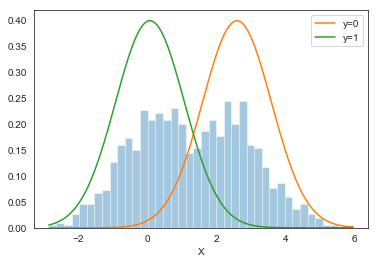

In [28]:
x = np.linspace(data.min(), data.max(), 200)
g_single = stats.norm(mu1, sigma1).pdf(x)
sns.distplot(data, bins=40, kde=False, norm_hist=True)
plt.plot(x, g_single, label='y=0')
g_single = stats.norm(mu2, sigma2).pdf(x)
plt.plot(x, g_single, label='y=1')
axes.set_xlim([data.min(),data.max()])
axes.set_ylim([0,0.5])
plt.legend();

In [29]:
import sklearn
from sklearn.mixture import GaussianMixture
import sys

# Fitting using a GMM with a single component
clf = GaussianMixture(n_components=2)
clf.fit(df)
print(clf.n_iter_)
print("first Normal Distribution mu = ",clf.means_[0][0],"  and sigma = ",clf.covariances_[0][0][0])
print("secound Normal Distribution mu = ",clf.means_[1][0],"  and sigma = ",clf.covariances_[1][0][0])

4
first Normal Distribution mu =  0.028340835315299913   and sigma =  0.9328634069149748
secound Normal Distribution mu =  2.567250292180723   and sigma =  1.0392263276212859


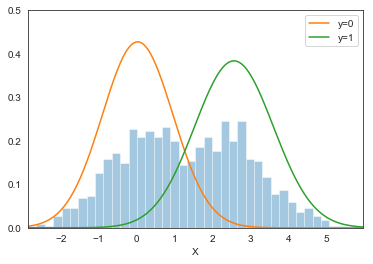

In [30]:
x = np.linspace(data.min(), data.max(), 200)
g_single = stats.norm(clf.means_[0][0], clf.covariances_[0][0][0]).pdf(x)
sns.distplot(data, bins=40, kde=False, norm_hist=True)
plt.plot(x, g_single, label='y=0')
g_single = stats.norm(clf.means_[1][0], clf.covariances_[1][0][0]).pdf(x)
plt.plot(x, g_single, label='y=1')
axes = plt.gca()
axes.set_xlim([data.min(),data.max()])
axes.set_ylim([0,0.5])
plt.legend();

In [31]:
print("diffrence between sklearn & our algorithm for 1st: mu = ",abs(clf.means_[0][0]-mu1),"  and sigma = ",abs(clf.covariances_[0][0][0]-sigma1))
print("diffrence between sklearn & our algorithm for 2nd: mu = ",abs(clf.means_[1][0]-mu2),"  and sigma = ",abs(clf.covariances_[1][0][0]-sigma2))

diffrence between sklearn & our algorithm for 1st: mu =  2.5680038413047717   and sigma =  0.06713659308502518
diffrence between sklearn & our algorithm for 2nd: mu =  2.493840268349659   and sigma =  0.03922632762128586
